# Лабораторная работа 2

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [52]:
df = pd.read_csv('boston_house_prices.csv', skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Влияние количества данных (строк)

In [53]:
def evaluate_model(X, y, title="Модель"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {"title": title, "MSE": mse, "MAE": mae, "R2": r2}

sample_sizes = [100, 200, 300, 400, len(df)]
results_rows = []

for size in sample_sizes:
    subset = df.sample(size, random_state=42)
    X = subset.drop(columns=["MEDV"])
    y = subset["MEDV"]
    result = evaluate_model(X, y, title=f"{size} строк")
    results_rows.append(result)

# Преобразование в DataFrame для отображения
results_df1 = pd.DataFrame(results_rows)
results_df1


,title,MSE,MAE,R2
0,100 строк,22.566374,3.576309,0.382773
1,200 строк,18.484456,3.332583,0.698339
2,300 строк,48.583412,4.159430,0.498161
3,400 строк,23.858440,3.080627,0.738398
4,506 строк,17.845040,3.072122,0.737187


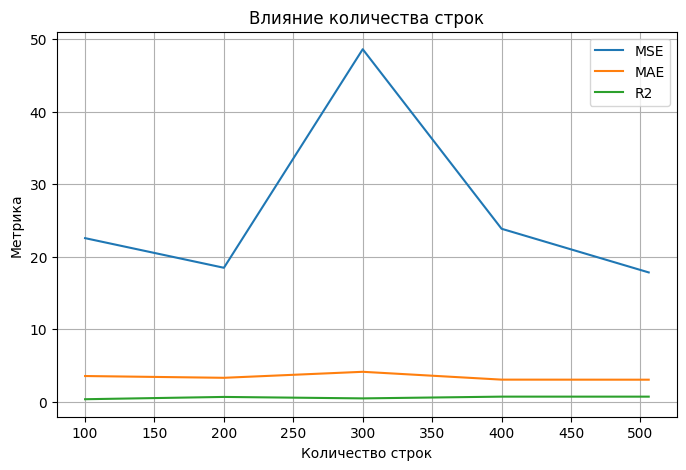

In [54]:
plt.figure(figsize=(8, 5))
for metric in ["MSE", "MAE", "R2"]:
    plt.plot(sample_sizes, results_df1[metric], label=metric)

plt.xlabel("Количество строк")
plt.ylabel("Метрика")
plt.title("Влияние количества строк")
plt.legend()
plt.grid(True)
plt.show()


### Влияние количества признаков

In [58]:
feature_sets = [
    ["RM", "LSTAT"],  # 2 признака
    ["RM", "LSTAT", "CRIM", "PTRATIO", "NOX", "AGE", "DIS"],  # 7 признаков
    df.columns[:-1].tolist()  # все 13 признаков
]

results_rows2 = []
for features in feature_sets:
    X = df[features]
    y = df["MEDV"]
    result = evaluate_model(X, y, title=f"{len(features)} признаков")
    results_rows2.append(result)

results_df2 = pd.DataFrame(results_rows2)
results_df2


,title,MSE,MAE,R2
0,2 признаков,30.387147,3.941563,0.588815
1,7 признаков,22.588379,3.330270,0.724332
2,13 признаков,17.080390,2.928969,0.753639


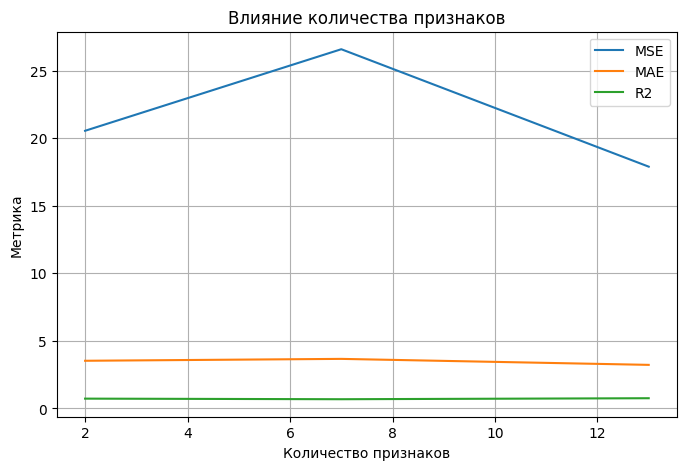

In [57]:
plt.figure(figsize=(8, 5))
for metric in ["MSE", "MAE", "R2"]:
    plt.plot([2, 7, 13], results_df2[metric], label=metric)

plt.xlabel("Количество признаков")
plt.ylabel("Метрика")
plt.title("Влияние количества признаков")
plt.legend()
plt.grid(True)
plt.show()


### Выводы

- Увеличение количества данных: С ростом объема обучающей выборки, точность модели (по R²) возрастает, ошибки MSE и MAE уменьшаются.
- Увеличение количества признаков: Увеличение числа признаков может улучшить точность, но слишком большое количество может привести к переобучению если данных мало.

## 2 часть

RM - среднее количество комнат
LSTAT - % населения с низким статусом

In [61]:
X = df[["RM", "LSTAT"]]
y = df["MEDV"]

In [63]:
model = LinearRegression()
model.fit(X, y)


rm_range = np.linspace(X["RM"].min(), X["RM"].max(), 50)
lstat_range = np.linspace(X["LSTAT"].min(), X["LSTAT"].max(), 50)
rm_grid, lstat_grid = np.meshgrid(rm_range, lstat_range)
X_grid = np.c_[rm_grid.ravel(), lstat_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(rm_grid.shape)

/home/alice/.pyenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


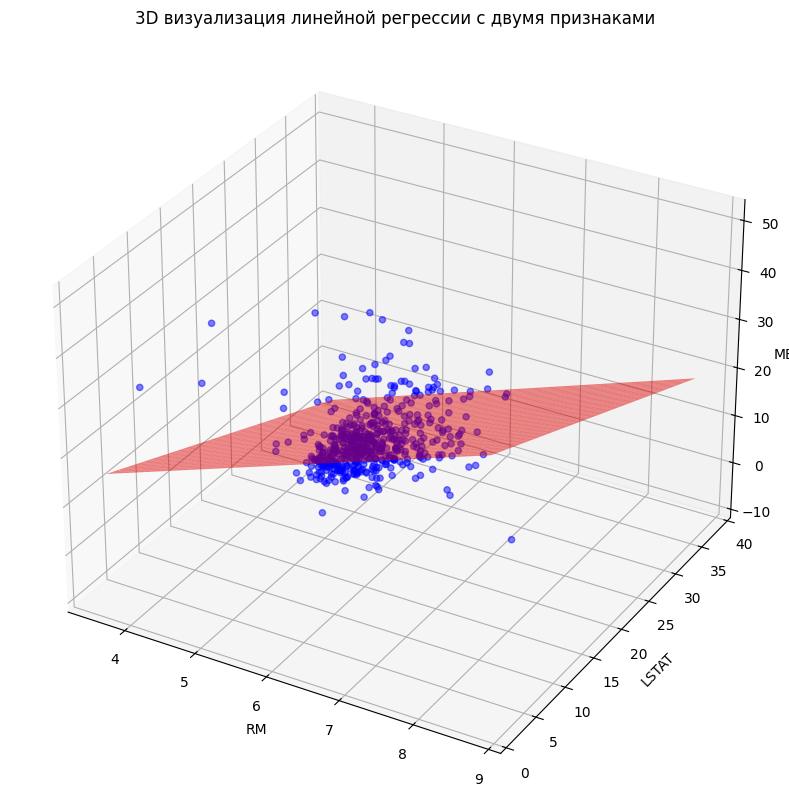

In [66]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X["RM"], X["LSTAT"], y, color="blue", label="Данные", alpha=0.5)
ax.plot_surface(rm_grid, lstat_grid, y_pred_grid, color="red", alpha=0.5, label="Плоскость")
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV")

plt.title("3D визуализация линейной регрессии с двумя признаками")
plt.show()
